<a href="https://colab.research.google.com/github/KATJAH92/Text-mining-de-tweets/blob/master/ANALISIS_DE_HASHTAG_POLITICOS_RELACIONADOS_A_LA_DISOLUCION_DEL_CONGRESO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pip install tweepy

In [0]:
% matplotlib inline
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = 10, 10
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
import tweepy
import json
from sklearn import datasets
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.linear_model import LinearRegression, Lasso, LassoCV, Ridge, RidgeCV
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

In [0]:
import textblob

In [0]:
import tweepy

In [0]:
# Importacion y autenticacion de la api

# https://stackoverflow.com/questions/47925828/how-to-create-a-pandas-dataframe-using-tweepy


consumer_key="XXXXXXXXXXXXXXXXXXXX"
consumer_secret="XXXXXXXXXXXXXXXXXXXX"

access_token="XXXXXXXXXXXXXXXXXXXX"
access_token_secret="XXXXXXXXXXXXXXXXXXXX"

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)

# Instancio la API
api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)

In [0]:
# Pruebo que funcione la API
print(api.me().name)

katja Joselyn


In [0]:
"""authors=['marianoobarrio','recondogaston','Reydeco76109764','lorenazvi','SandyCba25',
        'MiliSanchez57','Cecilia67392579','alejo65007005','Blablab25319048','jmnavas','NarwenRock',
         'MalbecYQueso','Perudefensavida','padre_sam','AaeFlores','VickyVillarruel','porlavida2014',
         'SebBolognese','realAlonsoDMD','BiondiniAR','lioOrtizdesign','Berlinabia','carlibarraza',
         'IsaCoachYVida','fjueguen','verolepera','gisellaLM','TvVallez','ofegal','danyelacar',
         'elianabled','VanesaReinoso7','EnamoSiempre','cordoba2016bis','evanahy80','bettyrava68',
         'Lovelaliarg','Dara68737232','Lujandavid3','An_Rosss','MaraCri15595144','javilo79',
         '9kamikaze','jjmhelguera']
list_tweets=[]

# Recorro todos los autores
for author in authors:
    print (author)
# Bajo los tweet de cada autor
#    tweets = api.user_timeline(screen_name=author, count = 1000, include_rts = False, tweet_mode='extended')
# Bajo los tweet segun hashtags
    tweets = tweepy.Cursor(api.search, q=author + ' -filter:retweets', lang='es', tweet_mode='extended').items(500)

    i = 0
    # Recorro todos los tweets
    for tweet in tweets:
        # Agrego los tweets a la lista
        list_tweets.append(tweet._json)
        i=i+1
    
    print (author + " " + str(i))

# Grabo los tweets en un archivo
with open('tweet_dh_test.json', 'w') as file:
        file.write(json.dumps(list_tweets, indent=4))
        
print("Descarga completa")
"""
authors=[
'#MechitaChallenge',
'#DisolucionDelCongreso',
'#LaUsurpadora',
'#MecheNoEsMiPresidenta',
'#CongresoDisuelto',
'#MecheElPeruTeRepudia',
'#VizcarraPresidente',
'#GraciasSalvadorDelSolar',
'#VacanciaPresidencialYa',
'Fuerzas Armadas',
'Peru'
]

list_tweets=[]

# Recorro todos los autores
for author in authors:
    print (author)
# Bajo los tweet segun hashtags
    tweets = tweepy.Cursor(api.search, q=author + ' -filter:retweets', lang='es', tweet_mode='extended').items(900)

    i = 0
    # Recorro todos los tweets
    for tweet in tweets:
        # Agrego los tweets a la lista
        list_tweets.append(tweet._json)
        i=i+1
    
    print (author + " " + str(i))

# Grabo los tweets en un archivo
with open('tweet_dh_test.json', 'w') as file:
        file.write(json.dumps(list_tweets, indent=4))
        
print("Descarga completa")

#MechitaChallenge
#MechitaChallenge 900
#DisolucionDelCongreso
#DisolucionDelCongreso 900
#LaUsurpadora


Rate limit reached. Sleeping for: 875


#LaUsurpadora 900
#MecheNoEsMiPresidenta
#MecheNoEsMiPresidenta 870
#CongresoDisuelto
#CongresoDisuelto 900
#MecheElPeruTeRepudia
#MecheElPeruTeRepudia 664
#VizcarraPresidente


Rate limit reached. Sleeping for: 876


#VizcarraPresidente 162
#GraciasSalvadorDelSolar
#GraciasSalvadorDelSolar 83
#VacanciaPresidencialYa
#VacanciaPresidencialYa 900
Fuerzas Armadas
Fuerzas Armadas 900
Peru


Rate limit reached. Sleeping for: 876


Peru 900
Descarga completa


In [0]:
tweets_list = []

print("Iniciando importacion")

# Abro el archivo de los tweets
with open('tweet_dh_test.json', encoding='utf-8') as json_file:  
    all_data = json.load(json_file)
    
# Recorro cada tweet
    for tweet in all_data:
        author = tweet['user']['screen_name']
        text = tweet['full_text']
        favorite_count = tweet['favorite_count']
        retweet_count = tweet['retweet_count']
        created_at = tweet['created_at']
# Concateno los hashtags
        hashtags = ''
        for hashtag in tweet['entities']['hashtags']:
            hashtags = hashtags + "#" + hashtag['text']
        
        tweets_list.append({
                            'author': str(author),
                             'text': str(text),
                             'favorite_count': int(favorite_count),
                             'retweet_count': int(retweet_count),
                             'created_at': created_at,
                             'hashtags': str(hashtags),
                            })

        tweet_json_a = pd.DataFrame(tweets_list, columns = 
                                  ['author', 'text', 
                                   'favorite_count', 'retweet_count', 
                                   'created_at', 'hashtags'])
        
print ("Importacion completa")

Iniciando importacion
Importacion completa


In [0]:
tweet_json_a.groupby(['author']).size()


author
09Lorelr            1
0c3n                2
10Alexduran         1
10Gisoje            1
1107Chavez          1
123456_kira         1
1451Luis            2
15minutosnews       1
16_nathalie         1
16kennyeA           1
1795Fabiana         1
193c053dd8ea4d9     1
195Dominguez        4
1993bebita          1
1_Patricia_1        1
1rayamasaltigre     1
2001Andyca         10
2011Rava7           1
2017peg             1
20mariosr           1
21Anita2            1
2480Crush           3
24J3ssicapdc        1
25Cloud             1
2609Sharon          1
317Mvam             1
3183684Nstor        1
4Chavezadriana      2
4iamcale            2
727poker            1
                   ..
yoannaale           4
yobanabailon        1
yojanavelasco       1
yomox1              1
yonassfernandez     1
yoni_she            1
yormon25            1
yoselodije1         1
yosexyalpaca        1
yovana71209824      2
yovisramos          1
yrma_ortega52       1
ysabelconY_         2
yucra_alejandro     1
yul

In [0]:
tweet_json_a = pd.DataFrame(tweets_list, columns = 
                                  ['author', 'text', 
                                   'favorite_count', 'retweet_count', 
                                   'created_at', 'hashtags'])
tweet_json_a.head(60)

,author,text,favorite_count,retweet_count,created_at,hashtags
0,EstupinanBetsy,@ugluis @MecheAF Ya pues!!\n#MechitaChallenge ...,1,0,Tue Oct 01 15:13:25 +0000 2019,#MechitaChallenge
1,Mishell60370710,@Carmen_sv5 @noakeikope @Mauriciomulder #Mechi...,1,0,Tue Oct 01 15:13:11 +0000 2019,#MechitaChallenge#MecheNoEresMiPresidenta#Mech...
2,FrancoGarciaB,@kolichrr Ya empezó el #MechitaChallenge,0,1,Tue Oct 01 15:13:00 +0000 2019,#MechitaChallenge
3,yurbyrisco,#LaUsurpadora Quien es tu president@?\n\n#Mech...,0,0,Tue Oct 01 15:12:55 +0000 2019,#LaUsurpadora#MechitaChallenge#MechitaTítereDe...
4,rocadepapel,"Con el cierre del Congreso, el ""pueblo"" y la g...",0,0,Tue Oct 01 15:12:42 +0000 2019,#MechitaChallenge
5,datsmica,tuve status con mis clientas y estuvimos cagán...,0,0,Tue Oct 01 15:12:32 +0000 2019,#MechitaChallenge
6,IposPeru,[AHORA] #MechitaChallenge https://t.co/ciRsb9hDwD,0,0,Tue Oct 01 15:12:28 +0000 2019,#MechitaChallenge
7,Patty_Sandy9,Mi Mikita también se une al #MechitaChallenge ...,1,0,Tue Oct 01 15:12:10 +0000 2019,#MechitaChallenge
8,ikevinarnold,@polaco_polito #MechitaChallenge debió ser est...,0,0,Tue Oct 01 15:11:30 +0000 2019,#MechitaChallenge
9,DboraMilagros1,Ahora todos quieren ser presidente del Perú 🔴⚪...,2,0,Tue Oct 01 15:11:20 +0000 2019,#MechitaChallenge


In [0]:
# Analisis descriptivo de los yweets tweet_json_a

In [0]:
tweet_json_a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8079 entries, 0 to 8078
Data columns (total 6 columns):
author            8079 non-null object
text              8079 non-null object
favorite_count    8079 non-null int64
retweet_count     8079 non-null int64
created_at        8079 non-null object
hashtags          8079 non-null object
dtypes: int64(2), object(4)
memory usage: 378.8+ KB


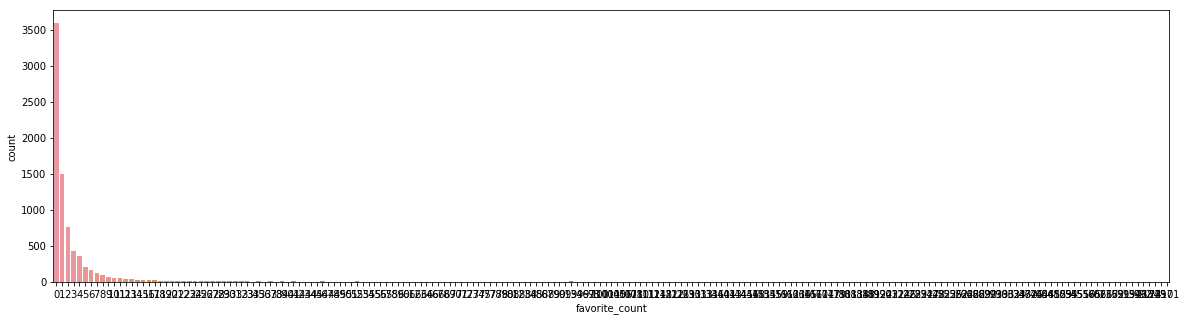

In [0]:
import seaborn as sns
plt.figure(figsize=(20,5))
sns.countplot(x='favorite_count', data=tweet_json_a);

In [0]:
# Minusculas
tweet_json_a['text'] = tweet_json_a['text'].str.lower()
tweet_json_a.sample(100)

,author,text,favorite_count,retweet_count,created_at,hashtags
6112,jlcckoky,@hectorbecerrilr #noalgolpedeestado \n#vacanci...,19,10,Mon Sep 30 16:12:09 +0000 2019,#NoAlGolpeDeEstado#VacanciaPresidencial#Vizcar...
2951,BenoniSalgado,#mechenoesmipresidenta tu #mercedesaf no eres ...,1,0,Tue Oct 01 12:42:33 +0000 2019,#MecheNoEsMiPresidenta#mercedesAF
1141,ma_me_mi_mo_mu2,@tefcabnov @diariodecurwen q tanque cojudoo.\n...,10,1,Tue Oct 01 14:08:26 +0000 2019,#DisolucionDelCongreso#CierreDelCongreso
6887,piscis1832,fuerzas armadas del perú respaldan a martín vi...,1,0,Tue Oct 01 12:23:33 +0000 2019,
1883,ContenidoDigit1,#mechitachallenge #mecheelperuterepudia #lausu...,2,0,Tue Oct 01 13:04:13 +0000 2019,#MechitaChallenge#MecheElPeruTeRepudia#LaUsurp...
4078,luispalmerg,@congresoperu @martinvizcarrac retirense pacíf...,1,0,Tue Oct 01 05:05:42 +0000 2019,#CongresoDisuelto
6368,jera_gmendez,beteta dice que esto ha sido un golpe de estad...,0,0,Tue Oct 01 15:02:01 +0000 2019,
3065,MickyMisteriO,#mechenoesmipresidenta solo lo es para 86 🐀🐀🐀,0,0,Tue Oct 01 11:16:42 +0000 2019,#MecheNoEsMiPresidenta
3394,luzkso,"@mecheaf @martinvizcarrac no eres, ni serás nu...",0,0,Tue Oct 01 03:34:44 +0000 2019,#MecheNoEsMiPresidenta
5606,paomiatorres,@tubinocarlos @martinvizcarrac esos no son nue...,0,0,Tue Oct 01 00:26:43 +0000 2019,#VacanciaPresidencialYa#VacanciaYa#GolpedeEstado


In [0]:
!pip install unidecode

     |████████████████████████████████| 245kB 4.9MB/s 


In [0]:
from unidecode import unidecode
tweet_json_a['text'] = tweet_json_a['text'].apply(unidecode)
tweet_json_a['text'].sample(100)

5514    la ignorancia y el caos reina en el #peru #vac...
2766    #mechitachallenge\n#mechenoesmipresidenta #per...
2077    @c_armendariz @lausurpadora_of @sandraecheverr...
6474    @catiquinto @mauriciopahuara ummm... proximo i...
4524    #vitocho fugado y ningun valiente peruano capa...
1854    @bdptv leido en wsp:\n"se viene el crossover m...
8029                         peru https://t.co/isdoswwoju
8001    querida @luzsalgado_r uso mi cuenta civil para...
556     quise hacerle el #mechitachallenge pero no qui...
3408    "altos mandos militares llegan a palacio de go...
7174    @claudiacisneros @americatv_peru @claraeospina...
2713    mientras tanto aca en peru.\nestamos en modo #...
2270    ?con quien se quedara #lausurpadora con melon ...
4051    consecuencias para que se lo piensen dos veces...
2383    mercedes araoz supero a su padrino ag. #lausur...
281     la declaro como presidenta interina de su escu...
1338    ? no se iban a quedar hasta quemar el ultimo c...
1954    esto e

In [0]:
import re
#pd.set_option('display.height', 1000)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 10000)
pd.set_option('display.expand_frame_repr', True)
pd.set_option('display.max_colwidth', 1000)

#reemplazar el \n por un espacio
tweet_json_a['text'] = tweet_json_a['text'].str.replace('\n', ' ')

#remuevo los links
tweet_json_a['text'] = tweet_json_a['text'].str.replace('http\S+|www.\S+', '', case=False)

#Remuevo lo que no son letras salvo las personas y los hashtags
tweet_json_a['text'] = tweet_json_a['text'].apply(lambda x: re.sub(r'([^\s\w#@]|\_)+', '', x))

#Remuevo los numeros
tweet_json_a['text'] = tweet_json_a['text'].apply(lambda x: re.sub(r'\s(\d)+\s', ' ', x))

tweet_json_a.head(200)

,author,text,favorite_count,retweet_count,created_at,hashtags
0,EstupinanBetsy,@ugluis @mecheaf ya pues #mechitachallenge corazon,1,0,Tue Oct 01 15:13:25 +0000 2019,#MechitaChallenge
1,Mishell60370710,@carmensv5 @noakeikope @mauriciomulder #mechitachallenge #mechenoeresmipresidenta #mechenomerepresentas toda la pantomima q hicieron usando a la titere #missbagua @mecheaf el peru te repudia,1,0,Tue Oct 01 15:13:11 +0000 2019,#MechitaChallenge#MecheNoEresMiPresidenta#MecheNoMeRepresentas#MissBagua
2,FrancoGarciaB,@kolichrr ya empezo el #mechitachallenge,0,1,Tue Oct 01 15:13:00 +0000 2019,#MechitaChallenge
3,yurbyrisco,#lausurpadora quien es tu president@ #mechitachallenge #mechitatiteredelamafia #mechenoeresmipresidenta,0,0,Tue Oct 01 15:12:55 +0000 2019,#LaUsurpadora#MechitaChallenge#MechitaTítereDeLaMafia#MecheNoEresMiPresidenta
4,rocadepapel,con el cierre del congreso el pueblo y la generacion joven del peru ya se olvidaron de odebrecht de los peajes las que mas celebraban anoche huilca y glave quienes se saben impunes ante sus delitos en @munilima el peru eligio izquierda ahora jodanse #mechitachallenge,0,0,Tue Oct 01 15:12:42 +0000 2019,#MechitaChallenge
5,datsmica,tuve status con mis clientas y estuvimos cagandonos de risa con los memes de #mechitachallenge,0,0,Tue Oct 01 15:12:32 +0000 2019,#MechitaChallenge
6,IposPeru,ahora #mechitachallenge,0,0,Tue Oct 01 15:12:28 +0000 2019,#MechitaChallenge
7,Patty_Sandy9,mi mikita tambien se une al #mechitachallenge y juramenta como presidenta,1,0,Tue Oct 01 15:12:10 +0000 2019,#MechitaChallenge
8,ikevinarnold,@polacopolito #mechitachallenge debio ser este cadaver,0,0,Tue Oct 01 15:11:30 +0000 2019,#MechitaChallenge
9,DboraMilagros1,ahora todos quieren ser presidente del peru gracias mechita araoz #mechitachallenge,2,0,Tue Oct 01 15:11:20 +0000 2019,#MechitaChallenge


In [0]:
tweet_json_a.shape

(8079, 6)

In [0]:
!pip install gensim
!pip install pyLDAVis
!pip install textblob

     |████████████████████████████████| 1.6MB 5.0MB/s 
  Created wheel for pyLDAVis: filename=pyLDAvis-2.1.2-py2.py3-none-any.whl size=97711 sha256=7d26cd82dc956d8d4c77c7572e37f936f20d424022e7c84bf8d44f70dbb8932c
  Stored in directory: /root/.cache/pip/wheels/98/71/24/513a99e58bb6b8465bae4d2d5e9dba8f0bef8179e3051ac414
Successfully built pyLDAVis


In [0]:
import pandas as pd
import numpy  
import string

In [0]:
# Importando todo NLTK
import nltk

# Tambien se puede importar modulos
from nltk.corpus import stopwords 
from nltk.stem.wordnet import WordNetLemmatizer

#Downloading NLP corpus from NLTK 
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [0]:
# Stop words = Creacion de un conjunto unico desde el listado de stopwords en ingles que viene con el paquete NLTK. 

stop = set(stopwords.words('spanish'))

# Idem punto anterior, se excluyen signos de puntuacion 

exclude = set(string.punctuation) 

# Lemmatizacion de las palabras 
lemma = WordNetLemmatizer()

def clean(doc):
    stop_free = " ".join([i for i in doc.lower().split() if i not in stop])
    punc_free = ''.join(ch for ch in stop_free if ch not in exclude)
    normalized = " ".join(lemma.lemmatize(word) for word in punc_free.split())
    return normalized

In [0]:
Cons = tweet_json_a['text']

In [0]:
for i in Cons[1:5]: 
    print(clean(i))

carmensv5 noakeikope mauriciomulder mechitachallenge mechenoeresmipresidenta mechenomerepresentas toda pantomima q hicieron usando titere missbagua mecheaf peru repudia
kolichrr empezo mechitachallenge
lausurpadora president mechitachallenge mechitatiteredelamafia mechenoeresmipresidenta
cierre congreso pueblo generacion joven peru olvidaron odebrecht peajes ma celebraban anoche huilca glave saben impunes delitos munilima peru eligio izquierda ahora jodanse mechitachallenge


In [0]:
!pip install wordcloud

In [0]:
from wordcloud import WordCloud

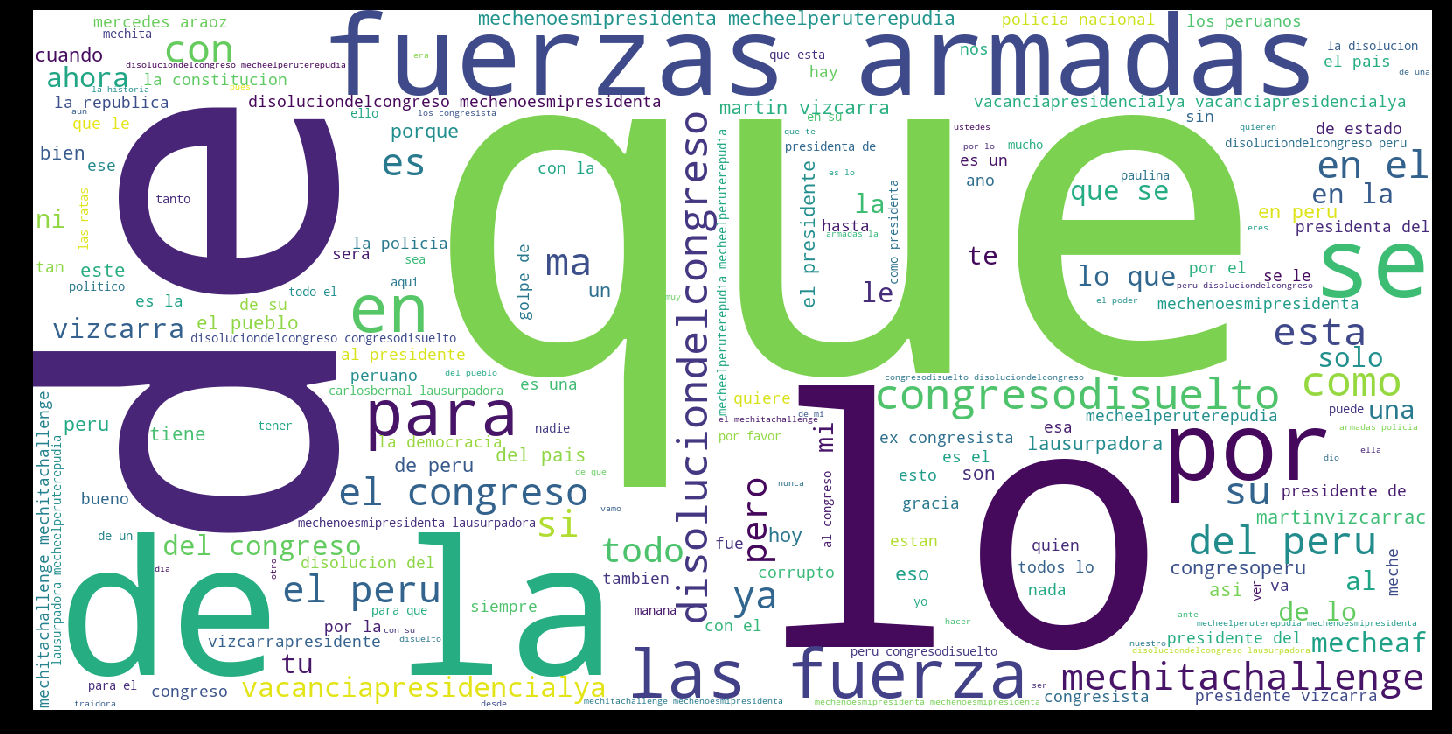

<Figure size 720x720 with 0 Axes>

In [0]:
your_list=tweet_json_a['text'].astype('str') 
your_list=your_list.tolist()

# Display the generated image:

wordcloud2 = WordCloud(width=1600, height=800, margin=0, background_color='white').generate(' '.join(your_list))

plt.figure( figsize=(20,10), facecolor='k')
plt.imshow(wordcloud2)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

plt.savefig('wordcloud.png', facecolor='k', bbox_inches='tight')

In [0]:
#evita errores de puntuación como # hashtag1, # hashtag2 (sin espacios), y la implementación es muy simple

import re,string

def strip_links(text):
    link_regex    = re.compile('((https?):((//)|(\\\\))+([\w\d:#@%/;$()~_?\+-=\\\.&](#!)?)*)', re.DOTALL)
    links         = re.findall(link_regex, text)
    for link in links:
        text = text.replace(link[0], ', ')    
    return text

def remove_arroba(text):
    r = re.findall('@[\w]*', text)
    for i in r:
        text = re.sub(i,'', text)
    
    return text
  
def remove_hashtag(text):
    r = re.findall('#[\w]*', text)
    for i in r:
        text = re.sub(i,'', text)
    
    return text

In [0]:
tweet_json_a['text'] = tweet_json_a['text'].map(lambda com : remove_arroba(com))

In [0]:
tweet_json_a['text'] = tweet_json_a['text'].map(lambda com : remove_hashtag(com))

In [0]:
tweet_json_a['text'] = tweet_json_a['text'].map(lambda com : strip_links(com))

In [0]:
tweet_json_a['text'] = tweet_json_a['text'].map(lambda com : clean(com))

In [0]:
tweet_json_a.head(10)

,author,text,favorite_count,retweet_count,created_at,hashtags
0,EstupinanBetsy,pues corazon,1,0,Tue Oct 01 15:13:25 +0000 2019,#MechitaChallenge
1,Mishell60370710,toda pantomima q hicieron usando titere peru repudia,1,0,Tue Oct 01 15:13:11 +0000 2019,#MechitaChallenge#MecheNoEresMiPresidenta#MecheNoMeRepresentas#MissBagua
2,FrancoGarciaB,empezo,0,1,Tue Oct 01 15:13:00 +0000 2019,#MechitaChallenge
3,yurbyrisco,president,0,0,Tue Oct 01 15:12:55 +0000 2019,#LaUsurpadora#MechitaChallenge#MechitaTítereDeLaMafia#MecheNoEresMiPresidenta
4,rocadepapel,cierre congreso pueblo generacion joven peru olvidaron odebrecht peajes ma celebraban anoche huilca glave saben impunes delitos peru eligio izquierda ahora jodanse,0,0,Tue Oct 01 15:12:42 +0000 2019,#MechitaChallenge
5,datsmica,status clientas cagandonos risa meme,0,0,Tue Oct 01 15:12:32 +0000 2019,#MechitaChallenge
6,IposPeru,ahora,0,0,Tue Oct 01 15:12:28 +0000 2019,#MechitaChallenge
7,Patty_Sandy9,mikita tambien une juramenta presidenta,1,0,Tue Oct 01 15:12:10 +0000 2019,#MechitaChallenge
8,ikevinarnold,debio ser cadaver,0,0,Tue Oct 01 15:11:30 +0000 2019,#MechitaChallenge
9,DboraMilagros1,ahora quieren ser presidente peru gracias mechita araoz,2,0,Tue Oct 01 15:11:20 +0000 2019,#MechitaChallenge


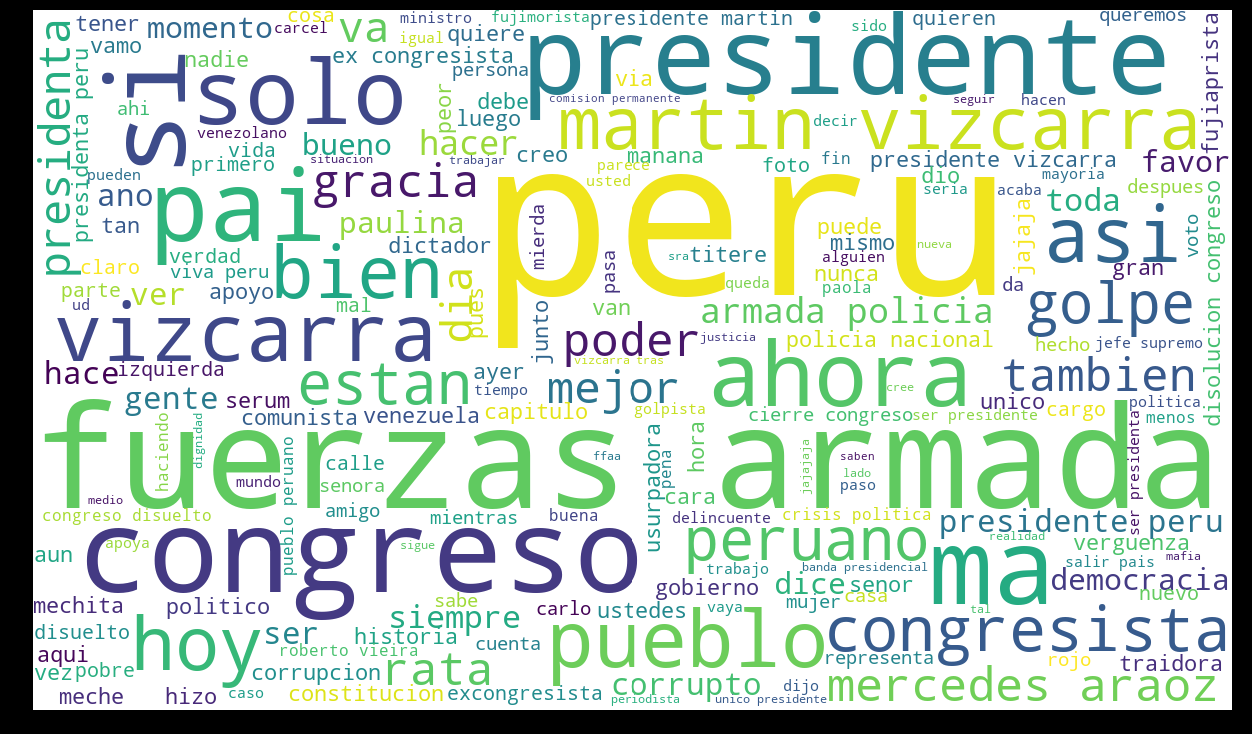

<Figure size 720x720 with 0 Axes>

In [0]:
#NUBE DE PALABRAS, DESPUES DE LA LIMPIEZA DEL TEXTO TW
your_list=tweet_json_a['text'].astype('str') 
your_list=your_list.tolist()

# Display the generated image:

wordcloud2 = WordCloud(width=1200, height=700, margin=0, background_color='white').generate(' '.join(your_list))

plt.figure( figsize=(20,10), facecolor='k')
plt.imshow(wordcloud2)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

plt.savefig('wordcloud.png', facecolor='k', bbox_inches='tight')

In [0]:
def clean_text(text):
    
    text = re.sub(' aqui ', ' ', text)
    text = re.sub(' cuenta ', ' ', text)
    text = re.sub(' asi ', ' ', text)
    text = re.sub(' gran ', ' ', text)
    text = re.sub(' dijo ', ' ', text)
    text = re.sub('vamo', ' ', text)
    text = re.sub('pasa', ' ', text)
    text = re.sub(' queda ', ' ', text)
    text = re.sub(' tal ', ' ', text)
    text = re.sub(' pues ', ' ', text)
    text = re.sub(' foto ', ' ', text)
    text = re.sub(' si ', ' ', text)
    text = re.sub(' aun ', ' ', text)
    text = re.sub(' cosa ', ' ', text)
    text = re.sub(' da ', ' ', text)
    text = re.sub('hoy ', ' ', text)
    text = re.sub('tan ', ' ', text)
    text = re.sub('ustedes ', ' ', text)
    text = re.sub(' serum ', ' ', text)
    text = re.sub('vez ', ' ', text)
    text = re.sub('sra ', ' ', text)
    text = re.sub('solo ', ' ', text)
    text = re.sub('senor ', ' ', text)
    text = re.sub('dia ', ' ', text)
    text = re.sub('paso ', ' ', text)
    
    text = re.sub('ahora ', ' ', text)
    text = re.sub(' hacer ', ' ', text)
    
    
    

    return text

In [0]:
tweet_json_a['text'] = tweet_json_a['text'].map(lambda com : clean_text(com))

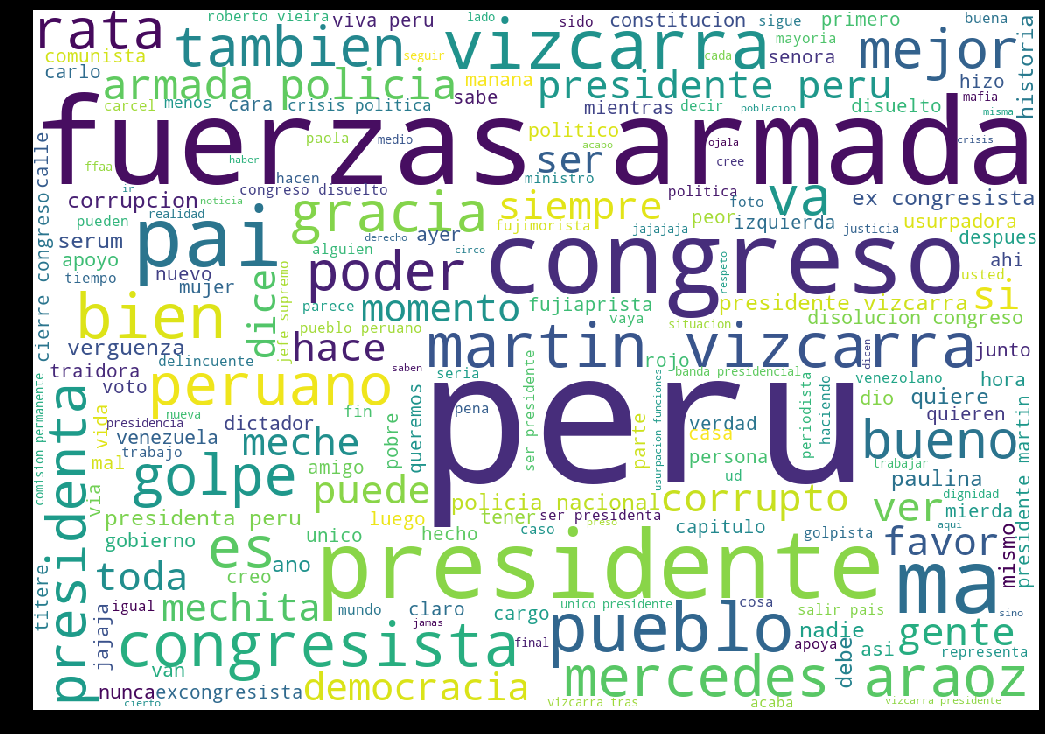

<Figure size 720x720 with 0 Axes>

In [0]:
your_list=tweet_json_a['text'].astype('str') 
your_list=your_list.tolist()

# Display the generated image:

wordcloud2 = WordCloud(width=1150, height=800, margin=0, background_color='white').generate(' '.join(your_list))

plt.figure( figsize=(20,10), facecolor='k')
plt.imshow(wordcloud2)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

plt.savefig('wordcloud.png', facecolor='k', bbox_inches='tight')

In [0]:
from sklearn.decomposition import NMF, LatentDirichletAllocation, TruncatedSVD
from sklearn.feature_extraction.text import CountVectorizer

In [0]:

vectorizer = CountVectorizer(min_df=0.01, max_df=0.9,stop_words=stop)
data_vectorized = vectorizer.fit_transform(Cons)

In [0]:
tf_feature_names = vectorizer.get_feature_names()

In [0]:
lda_model = LatentDirichletAllocation(n_components=5, max_iter=25, learning_method='online')
lda_Z = lda_model.fit_transform(data_vectorized)

In [0]:
import pyLDAvis.sklearn
 
pyLDAvis.enable_notebook()
panel = pyLDAvis.sklearn.prepare(lda_model, data_vectorized, vectorizer, mds='tsne')
panel

/usr/local/lib/python3.6/dist-packages/pyLDAvis/_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


PreparedData(topic_coordinates=                x           y  topics  cluster       Freq
topic                                                    
4       71.610176 -132.636185       1        1  26.052038
1      -39.265064 -123.498489       2        1  19.574748
3       27.649374   11.254357       3        1  19.063235
2      -80.612549  -15.731095       4        1  17.973678
0      130.034164  -33.086521       5        1  17.336301, topic_info=   Category         Freq            Term        Total  loglift  logprob
55  Default  1720.000000            peru  1720.000000  30.0000  30.0000
63  Default  1090.000000      presidente  1090.000000  29.0000  29.0000
30  Default   927.000000         fuerzas   927.000000  28.0000  28.0000
4   Default   917.000000          armada   917.000000  27.0000  27.0000
15  Default  1057.000000        congreso  1057.000000  26.0000  26.0000
93  Default   798.000000        vizcarra   798.000000  25.0000  25.0000
53  Default   567.000000            pais   567.000000  24.0000  24.0000
62  Default   476.000000      presidenta   476.000000  23.0000  23.0000
40  Default   590.000000              ma   590.000000  22.0000  22.0000
66  Default   356.000000          pueblo   356.000000  21.0000  21.0000
3   Default   270.000000           araoz   270.000000  20.0000  20.0000
43  Default   243.000000           meche   243.000000  19.0000  19.0000
14  Default   230.000000    congresistas   230.000000  18.0000  18.0000
87  Default   213.000000              va   213.000000  17.0000  17.0000
7   Default   222.000000            bien   222.000000  16.0000  16.0000
60  Default   209.000000        politica   209.000000  15.0000  15.0000
67  Default   211.000000           puede   211.000000  14.0000  14.0000
58  Default   206.000000           poder   206.000000  13.0000  13.0000
81  Default   210.000000         tambien   210.000000  12.0000  12.0000
42  Default   255.000000          martin   255.000000  11.0000  11.0000
46  Default   199.000000        mercedes   199.000000  10.0000  10.0000
34  Default   195.000000           golpe   195.000000   9.0000   9.0000
35  Default   193.000000         gracias   193.000000   8.0000   8.0000
44  Default   181.000000         mechita   181.000000   7.0000   7.0000
59  Default   231.000000         policia   231.000000   6.0000   6.0000
27  Default   185.000000              do   185.000000   5.0000   5.0000
78  Default   175.000000              si   175.000000   4.0000   4.0000
45  Default   174.000000           mejor   174.000000   3.0000   3.0000
1   Default   163.000000             ano   163.000000   2.0000   2.0000
89  Default   149.000000             ver   149.000000   1.0000   1.0000
30   Topic1   926.480214         fuerzas   927.274498   1.3442  -1.7182
4    Topic1   916.817624          armada   917.611666   1.3442  -1.7287
93   Topic1   797.445507        vizcarra   798.245410   1.3441  -1.8682
42   Topic1   254.554410          martin   255.351794   1.3419  -3.0101
59   Topic1   230.447391         policia   231.240456   1.3416  -3.1096
2    Topic1   159.207291           apoyo   160.004456   1.3401  -3.4794
49   Topic1   150.639551        nacional   151.433703   1.3398  -3.5347
71   Topic1   144.216991           ratas   145.014151   1.3396  -3.5783
22   Topic1   141.603276      democracia   142.405845   1.3394  -3.5966
82   Topic1   132.903326            toda   133.703611   1.3391  -3.6600
90   Topic1   125.180949       verguenza   125.980829   1.3387  -3.7199
74   Topic1   121.579516        respaldo   122.376617   1.3385  -3.7491
17   Topic1   113.697385  constitucional   114.499765   1.3380  -3.8161
88   Topic1    96.367373       venezuela    97.170198   1.3368  -3.9815
19   Topic1    92.776733       corruptos    93.582990   1.3364  -4.0194
6    Topic1    89.827947           banda    90.626313   1.3362  -4.0517
73   Topic1    86.766555       respaldan    87.560619   1.3360  -4.0864
24   Topic1    84.721916        dictador    85.519141   1.3357  -4.1103
12   Topic1    79.85223